# PIVOT 2022 Geothermal Datathon: SPE - Gulf Coast Section
## Exploratory Data Analysis


#### - Team: 
GeotherML    
    
#### - Team Members:
- Antonio Dagnino
- Andres Calvo
- Oliver Rojas
- Yusuf Falola
- Chandryl Paterne    
    
#### - Contents:


   - **Exploratory Data Analysis**
        - Overview of dataset
        - Check for missing data
        - check for columns without meaningful information
        - Determine inputs and outputs based on project scope
        - Check for correlation between features
        - Overview of embedded Time-series columns
        - Feature engineering: Average quarterly time-series to yearly time-series and filter to 20year lifespan
        - Import Second Dataset and concatenate with initial dataset
        - Export all dataframes for future Data Modeling
    



### Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Customize Plots
rcParams['figure.figsize'] = 14,8
rcParams['axes.titlesize'] = 15
rcParams['font.size']=10

#show all columns in Jupyter Notebook
pd.set_option("display.max_columns", None)

- **Overview of Dataset**

In [3]:
df_raw = pd.read_csv('inputs_results_FORGE_main30yr.csv')

In [4]:
df_raw.head()

,pin,size,ResDepth,ResGradient,ResRho,ResKt,ResSv,AmbTempC,AmbPres,ResE,Resv,ResG,Ks3,Ks2,s3Azn,s3AznVar,s3Dip,s3DipVar,fNum0,fDia_min0,fDia_max0,fStr_nom0,fStr_var0,fDip_nom0,fDip_var0,fNum1,fDia_min1,fDia_max1,fStr_nom1,fStr_var1,fDip_nom1,fDip_var1,fNum2,fDia_min2,fDia_max2,fStr_nom2,fStr_var2,fDip_nom2,fDip_var2,alpha0,alpha1,alpha2,gamma0,gamma1,gamma2,n10,n11,n12,a0,a1,a2,b0,b1,b2,N0,N1,N2,bh0,bh1,bh2,bh_min,bh_max,bh_bound,f_roughness,w_count,w_spacing,w_length,w_azimuth,w_dip,w_proportion,w_phase,w_toe,w_skew,w_intervals,ra,rb,rc,rgh,CemKt,CemSv,GenEfficiency,LifeSpan,TimeSteps,p_whp,Tinj,H_ConvCoef,dT0,dE0,PoreRho,Poremu,Porek,Frack,BH_T,BH_P,s1,s2,s3,perf,r_perf,sand,leakoff,dPp,dPi,stim_limit,Qinj,Vinj,Qstim,Vstim,bval,phi0,phi1,phi2,mcc0,mcc1,mcc2,hfmcc,hfphi,type_last,Pc_last,sn_last,Pcen_last,Pmax_last,dia_last,qinj,qpro,qleak,qgain,recovery,pinj,hinj,v5,ixint,pxint,hfstim,nfstim,mpro,hpro:0.000,hpro:0.250,hpro:0.500,hpro:0.750,hpro:1.000,hpro:1.250,hpro:1.500,hpro:1.750,hpro:2.000,hpro:2.250,hpro:2.500,hpro:2.750,hpro:3.000,hpro:3.250,hpro:3.500,hpro:3.750,hpro:4.000,hpro:4.250,hpro:4.500,hpro:4.750,hpro:5.000,hpro:5.250,hpro:5.500,hpro:5.750,hpro:6.000,hpro:6.250,hpro:6.500,hpro:6.750,hpro:7.000,hpro:7.250,hpro:7.500,hpro:7.750,hpro:8.000,hpro:8.250,hpro:8.500,hpro:8.750,hpro:9.000,hpro:9.250,hpro:9.500,hpro:9.750,hpro:10.000,hpro:10.250,hpro:10.500,hpro:10.750,hpro:11.000,hpro:11.250,hpro:11.500,hpro:11.750,hpro:12.000,hpro:12.250,hpro:12.500,hpro:12.750,hpro:13.000,hpro:13.250,hpro:13.500,hpro:13.750,hpro:14.000,hpro:14.250,hpro:14.500,hpro:14.750,hpro:15.000,hpro:15.250,hpro:15.500,hpro:15.750,hpro:16.000,hpro:16.250,hpro:16.500,hpro:16.750,hpro:17.000,hpro:17.250,hpro:17.500,hpro:17.750,hpro:18.000,hpro:18.250,hpro:18.500,hpro:18.750,hpro:19.000,hpro:19.250,hpro:19.500,hpro:19.750,hpro:20.000,hpro:20.250,hpro:20.500,hpro:20.750,hpro:21.000,hpro:21.250,hpro:21.500,hpro:21.750,hpro:22.000,hpro:22.250,hpro:22.500,hpro:22.750,hpro:23.000,hpro:23.250,hpro:23.500,hpro:23.750,hpro:24.000,hpro:24.250,hpro:24.500,hpro:24.750,hpro:25.000,hpro:25.250,hpro:25.500,hpro:25.750,hpro:26.000,hpro:26.250,hpro:26.500,hpro:26.750,hpro:27.000,hpro:27.250,hpro:27.500,hpro:27.750,hpro:28.000,hpro:28.250,hpro:28.500,hpro:28.750,hpro:29.000,hpro:29.250,hpro:29.500,hpro:29.750,Pout:0.000,Pout:0.250,Pout:0.500,Pout:0.750,Pout:1.000,Pout:1.250,Pout:1.500,Pout:1.750,Pout:2.000,Pout:2.250,Pout:2.500,Pout:2.750,Pout:3.000,Pout:3.250,Pout:3.500,Pout:3.750,Pout:4.000,Pout:4.250,Pout:4.500,Pout:4.750,Pout:5.000,Pout:5.250,Pout:5.500,Pout:5.750,Pout:6.000,Pout:6.250,Pout:6.500,Pout:6.750,Pout:7.000,Pout:7.250,Pout:7.500,Pout:7.750,Pout:8.000,Pout:8.250,Pout:8.500,Pout:8.750,Pout:9.000,Pout:9.250,Pout:9.500,Pout:9.750,Pout:10.000,Pout:10.250,Pout:10.500,Pout:10.750,Pout:11.000,Pout:11.250,Pout:11.500,Pout:11.750,Pout:12.000,Pout:12.250,Pout:12.500,Pout:12.750,Pout:13.000,Pout:13.250,Pout:13.500,Pout:13.750,Pout:14.000,Pout:14.250,Pout:14.500,Pout:14.750,Pout:15.000,Pout:15.250,Pout:15.500,Pout:15.750,Pout:16.000,Pout:16.250,Pout:16.500,Pout:16.750,Pout:17.000,Pout:17.250,Pout:17.500,Pout:17.750,Pout:18.000,Pout:18.250,Pout:18.500,Pout:18.750,Pout:19.000,Pout:19.250,Pout:19.500,Pout:19.750,Pout:20.000,Pout:20.250,Pout:20.500,Pout:20.750,Pout:21.000,Pout:21.250,Pout:21.500,Pout:21.750,Pout:22.000,Pout:22.250,Pout:22.500,Pout:22.750,Pout:23.000,Pout:23.250,Pout:23.500,Pout:23.750,Pout:24.000,Pout:24.250,Pout:24.500,Pout:24.750,Pout:25.000,Pout:25.250,Pout:25.500,Pout:25.750,Pout:26.000,Pout:26.250,Pout:26.500,Pout:26.750,Pout:27.000,Pout:27.250,Pout:27.500,Pout:27.750,Pout:28.000,Pout:28.250,Pout:28.500,Pout:28.750,Pout:29.000,Pout:29.250,Pout:29.500,Pout:29.750,dhout:0.000,dhout:0.250,dhout:0.500,dhout:0.750,dhout:1.000,dhout:1.250,dhout:1.500,dhout:1.750,dhout:2.000,dhout:2.250,dhout:2.500,dhout:2.750,dhout:3.000,dhout:3.250,dhout:3.500,dhout:3.750,dhout:4.000,dhout:4.250,dhout:4.500,dhout:4.750,dhout:5.000,dhout:5.250,dhout:5.500,dhout:5.750,

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44492 entries, 0 to 44491
Columns: 496 entries, pin to dhout:29.750
dtypes: float64(491), int64(5)
memory usage: 168.4 MB


In [6]:
df_raw.columns.to_list()

['pin',
 'size',
 'ResDepth',
 'ResGradient',
 'ResRho',
 'ResKt',
 'ResSv',
 'AmbTempC',
 'AmbPres',
 'ResE',
 'Resv',
 'ResG',
 'Ks3',
 'Ks2',
 's3Azn',
 's3AznVar',
 's3Dip',
 's3DipVar',
 'fNum0',
 'fDia_min0',
 'fDia_max0',
 'fStr_nom0',
 'fStr_var0',
 'fDip_nom0',
 'fDip_var0',
 'fNum1',
 'fDia_min1',
 'fDia_max1',
 'fStr_nom1',
 'fStr_var1',
 'fDip_nom1',
 'fDip_var1',
 'fNum2',
 'fDia_min2',
 'fDia_max2',
 'fStr_nom2',
 'fStr_var2',
 'fDip_nom2',
 'fDip_var2',
 'alpha0',
 'alpha1',
 'alpha2',
 'gamma0',
 'gamma1',
 'gamma2',
 'n10',
 'n11',
 'n12',
 'a0',
 'a1',
 'a2',
 'b0',
 'b1',
 'b2',
 'N0',
 'N1',
 'N2',
 'bh0',
 'bh1',
 'bh2',
 'bh_min',
 'bh_max',
 'bh_bound',
 'f_roughness',
 'w_count',
 'w_spacing',
 'w_length',
 'w_azimuth',
 'w_dip',
 'w_proportion',
 'w_phase',
 'w_toe',
 'w_skew',
 'w_intervals',
 'ra',
 'rb',
 'rc',
 'rgh',
 'CemKt',
 'CemSv',
 'GenEfficiency',
 'LifeSpan',
 'TimeSteps',
 'p_whp',
 'Tinj',
 'H_ConvCoef',
 'dT0',
 'dE0',
 'PoreRho',
 'Poremu',
 'P

- **Check for Missing Data**

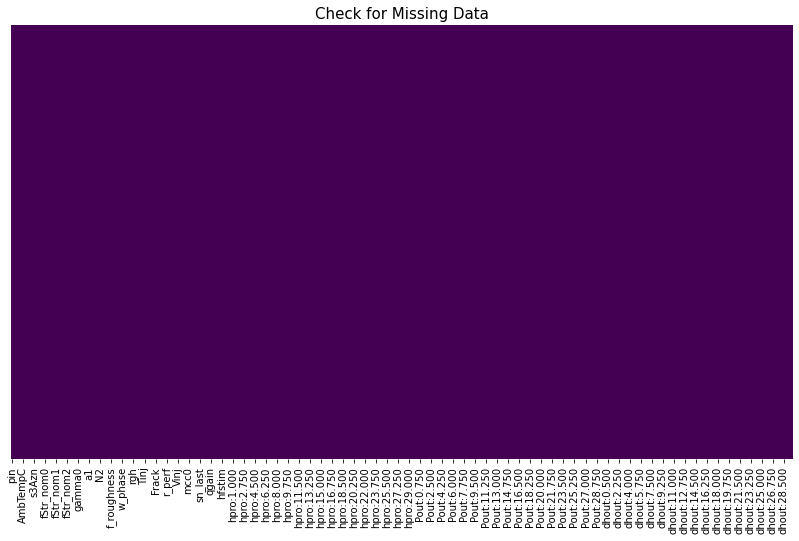

In [7]:
#Use heatmap to identify mising data
ax = plt.axes()
ax.set_title('Check for Missing Data')
sns.heatmap(df_raw.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax);

In [8]:
print('\n\n ----- No Null Data: -----')
df_raw.isnull().sum().sort_values(ascending=False)



 ----- No Null Data: -----


dhout:29.750    0
hpro:8.250      0
hpro:5.000      0
hpro:5.250      0
hpro:5.500      0
               ..
Pout:19.750     0
Pout:20.000     0
Pout:20.250     0
Pout:20.500     0
pin             0
Length: 496, dtype: int64

- **check for columns without meaningful information**

In [9]:
# Columns that contain 1 unique value (no meaningful information)
print('\n\n----- Columns without meaninful information: -----')
df_raw.loc[:,df_raw.nunique() == 1].columns



----- Columns without meaninful information: -----


Index(['size', 'AmbTempC', 'AmbPres', 's3AznVar', 's3DipVar', 'fDia_min0',
       'fDia_max0', 'fStr_nom0', 'fStr_var0', 'fDip_nom0', 'fDip_var0',
       'fDia_min1', 'fDia_max1', 'fStr_nom1', 'fStr_var1', 'fDip_nom1',
       'fDip_var1', 'fDia_min2', 'fDia_max2', 'fStr_nom2', 'fStr_var2',
       'fDip_nom2', 'fDip_var2', 'alpha0', 'alpha1', 'alpha2', 'gamma0',
       'gamma1', 'gamma2', 'n10', 'n11', 'n12', 'a0', 'a1', 'a2', 'b0', 'b1',
       'b2', 'N0', 'N1', 'N2', 'bh0', 'bh1', 'bh2', 'bh_min', 'bh_max',
       'w_count', 'w_length', 'w_azimuth', 'w_dip', 'ra', 'rb', 'rc', 'rgh',
       'CemKt', 'CemSv', 'GenEfficiency', 'LifeSpan', 'TimeSteps', 'p_whp',
       'H_ConvCoef', 'dT0', 'Poremu', 'Porek', 'Frack', 'perf', 'sand',
       'leakoff', 'dPi', 'stim_limit', 'Qstim', 'Vstim', 'bval', 'phi0',
       'phi1', 'phi2', 'mcc0', 'mcc1', 'mcc2'],
      dtype='object')

Remarks: All those columns shown above have only 1 unique value. therefore, they do not provide meaningful information to the model.


In [10]:
print('\n\n Number of Columns without meaningful information:    ',len(df_raw.loc[:,df_raw.nunique() == 1].columns),'\n\n')



 Number of Columns without meaningful information:     79 




In [11]:
df_raw.loc[:,df_raw.nunique() > 1]

,pin,ResDepth,ResGradient,ResRho,ResKt,ResSv,ResE,Resv,ResG,Ks3,Ks2,s3Azn,s3Dip,fNum0,fNum1,fNum2,bh_bound,f_roughness,w_spacing,w_proportion,w_phase,w_toe,w_skew,w_intervals,Tinj,dE0,PoreRho,BH_T,BH_P,s1,s2,s3,r_perf,dPp,Qinj,Vinj,hfmcc,hfphi,type_last,Pc_last,sn_last,Pcen_last,Pmax_last,dia_last,qinj,qpro,qleak,qgain,recovery,pinj,hinj,v5,ixint,pxint,hfstim,nfstim,mpro,hpro:0.000,hpro:0.250,hpro:0.500,hpro:0.750,hpro:1.000,hpro:1.250,hpro:1.500,hpro:1.750,hpro:2.000,hpro:2.250,hpro:2.500,hpro:2.750,hpro:3.000,hpro:3.250,hpro:3.500,hpro:3.750,hpro:4.000,hpro:4.250,hpro:4.500,hpro:4.750,hpro:5.000,hpro:5.250,hpro:5.500,hpro:5.750,hpro:6.000,hpro:6.250,hpro:6.500,hpro:6.750,hpro:7.000,hpro:7.250,hpro:7.500,hpro:7.750,hpro:8.000,hpro:8.250,hpro:8.500,hpro:8.750,hpro:9.000,hpro:9.250,hpro:9.500,hpro:9.750,hpro:10.000,hpro:10.250,hpro:10.500,hpro:10.750,hpro:11.000,hpro:11.250,hpro:11.500,hpro:11.750,hpro:12.000,hpro:12.250,hpro:12.500,hpro:12.750,hpro:13.000,hpro:13.250,hpro:13.500,hpro:13.750,hpro:14.000,hpro:14.250,hpro:14.500,hpro:14.750,hpro:15.000,hpro:15.250,hpro:15.500,hpro:15.750,hpro:16.000,hpro:16.250,hpro:16.500,hpro:16.750,hpro:17.000,hpro:17.250,hpro:17.500,hpro:17.750,hpro:18.000,hpro:18.250,hpro:18.500,hpro:18.750,hpro:19.000,hpro:19.250,hpro:19.500,hpro:19.750,hpro:20.000,hpro:20.250,hpro:20.500,hpro:20.750,hpro:21.000,hpro:21.250,hpro:21.500,hpro:21.750,hpro:22.000,hpro:22.250,hpro:22.500,hpro:22.750,hpro:23.000,hpro:23.250,hpro:23.500,hpro:23.750,hpro:24.000,hpro:24.250,hpro:24.500,hpro:24.750,hpro:25.000,hpro:25.250,hpro:25.500,hpro:25.750,hpro:26.000,hpro:26.250,hpro:26.500,hpro:26.750,hpro:27.000,hpro:27.250,hpro:27.500,hpro:27.750,hpro:28.000,hpro:28.250,hpro:28.500,hpro:28.750,hpro:29.000,hpro:29.250,hpro:29.500,hpro:29.750,Pout:0.000,Pout:0.250,Pout:0.500,Pout:0.750,Pout:1.000,Pout:1.250,Pout:1.500,Pout:1.750,Pout:2.000,Pout:2.250,Pout:2.500,Pout:2.750,Pout:3.000,Pout:3.250,Pout:3.500,Pout:3.750,Pout:4.000,Pout:4.250,Pout:4.500,Pout:4.750,Pout:5.000,Pout:5.250,Pout:5.500,Pout:5.750,Pout:6.000,Pout:6.250,Pout:6.500,Pout:6.750,Pout:7.000,Pout:7.250,Pout:7.500,Pout:7.750,Pout:8.000,Pout:8.250,Pout:8.500,Pout:8.750,Pout:9.000,Pout:9.250,Pout:9.500,Pout:9.750,Pout:10.000,Pout:10.250,Pout:10.500,Pout:10.750,Pout:11.000,Pout:11.250,Pout:11.500,Pout:11.750,Pout:12.000,Pout:12.250,Pout:12.500,Pout:12.750,Pout:13.000,Pout:13.250,Pout:13.500,Pout:13.750,Pout:14.000,Pout:14.250,Pout:14.500,Pout:14.750,Pout:15.000,Pout:15.250,Pout:15.500,Pout:15.750,Pout:16.000,Pout:16.250,Pout:16.500,Pout:16.750,Pout:17.000,Pout:17.250,Pout:17.500,Pout:17.750,Pout:18.000,Pout:18.250,Pout:18.500,Pout:18.750,Pout:19.000,Pout:19.250,Pout:19.500,Pout:19.750,Pout:20.000,Pout:20.250,Pout:20.500,Pout:20.750,Pout:21.000,Pout:21.250,Pout:21.500,Pout:21.750,Pout:22.000,Pout:22.250,Pout:22.500,Pout:22.750,Pout:23.000,Pout:23.250,Pout:23.500,Pout:23.750,Pout:24.000,Pout:24.250,Pout:24.500,Pout:24.750,Pout:25.000,Pout:25.250,Pout:25.500,Pout:25.750,Pout:26.000,Pout:26.250,Pout:26.500,Pout:26.750,Pout:27.000,Pout:27.250,Pout:27.500,Pout:27.750,Pout:28.000,Pout:28.250,Pout:28.500,Pout:28.750,Pout:29.000,Pout:29.250,Pout:29.500,Pout:29.750,dhout:0.000,dhout:0.250,dhout:0.500,dhout:0.750,dhout:1.000,dhout:1.250,dhout:1.500,dhout:1.750,dhout:2.000,dhout:2.250,dhout:2.500,dhout:2.750,dhout:3.000,dhout:3.250,dhout:3.500,dhout:3.750,dhout:4.000,dhout:4.250,dhout:4.500,dhout:4.750,dhout:5.000,dhout:5.250,dhout:5.500,dhout:5.750,dhout:6.000,dhout:6.250,dhout:6.500,dhout:6.750,dhout:7.000,dhout:7.250,dhout:7.500,dhout:7.750,dhout:8.000,dhout:8.250,dhout:8.500,dhout:8.750,dhout:9.000,dhout:9.250,dhout:9.500,dhout:9.750,dhout:10.000,dhout:10.250,dhout:10.500,dhout:10.750,dhout:11.000,dhout:11.250,dhout:11.500,dhout:11.750,dhout:12.000,dhout:12.250,dhout:12.500,dhout:12.750,dhout:13.000,dhout:13.250,dhout:13.500,dhout:13.750,dhout:14.000,dhout:14.250,dhout:14.500,dhout:14.750,dhout:15.000,dhout:15.250,dhout:15.500,dhout:15.750,dhout:16.000,dhout:16.250,dhout:16

In [12]:
# Dataframe with filters columns (explude columns without meaningful information)

df = df_raw.loc[:,df_raw.nunique() > 1]

- **Determine inputs and outputs based on project scope**

In [13]:
inputs = df.loc[:,'ResDepth':'hfphi']
outputs = df.loc[:,'type_last':'mpro']

Remarks: 'pin' column is also removed because it works as an identifier and thus, it has random values that can create noise to ML models if included.

- **Check for Correlation between inputs**

In [14]:
print(f"""\nInputs: {len(inputs.columns)}\nOutputs: {len(outputs.columns)}\n""")


Inputs: 37
Outputs: 19



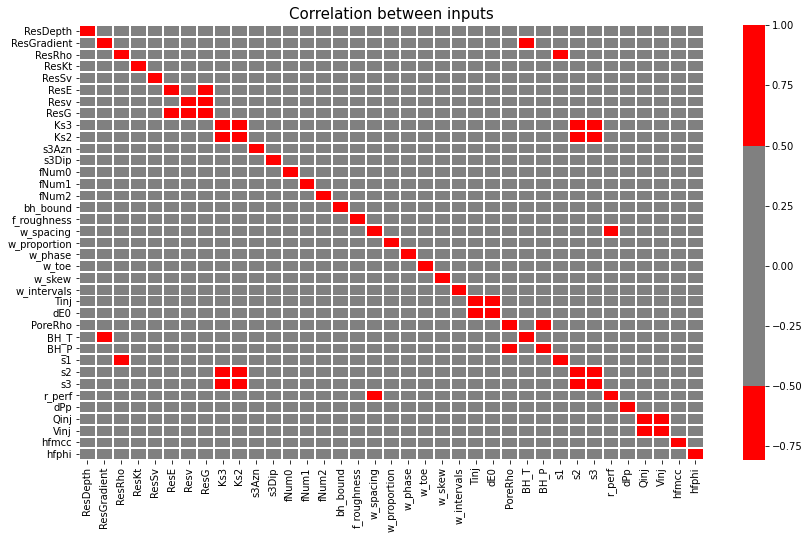

In [15]:
fig = plt.figure()
ax = plt.axes()
ax.set_title('Correlation between inputs')
sns.heatmap(inputs.corr(),cmap=['red','gray','gray','red'],annot=False,linecolor='white',linewidth=1,center=0);

In [16]:
inputs.corr()[(inputs.corr() > 0.8) | (inputs.corr() < -0.8)].dropna(thresh=2).replace({np.nan:''})

,ResDepth,ResGradient,ResRho,ResKt,ResSv,ResE,Resv,ResG,Ks3,Ks2,s3Azn,s3Dip,fNum0,fNum1,fNum2,bh_bound,f_roughness,w_spacing,w_proportion,w_phase,w_toe,w_skew,w_intervals,Tinj,dE0,PoreRho,BH_T,BH_P,s1,s2,s3,r_perf,dPp,Qinj,Vinj,hfmcc,hfphi
ResGradient,,1,,,,,,,,,,,,,,,,,,,,,,,,,0.981212,,,,,,,,,,
ResRho,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,0.998,,,,,,,,
Ks3,,,,,,,,,1,,,,,,,,,,,,,,,,,,,,,,0.97407,,,,,,
Ks2,,,,,,,,,,1,,,,,,,,,,,,,,,,,,,,0.947965,,,,,,,
w_spacing,,,,,,,,,,,,,,,,,,1,,,,,,,,,,,,,,0.999991,,,,,
Tinj,,,,,,,,,,,,,,,,,,,,,,,,1,-0.806782,,,,,,,,,,,,
dE0,,,,,,,,,,,,,,,,,,,,,,,,-0.806782,1,,,,,,,,,,,,
PoreRho,,,,,,,,,,,,,,,,,,,,,,,,,,1,,0.811971,,,,,,,,,
BH_T,,0.981212,,,,,,,,,,,,,,,,,,,,,,,,,1,,,,,,,,,,
BH_P,,,,,,,,,,,,,,,,,,,,,,,,,,0.811971,,1,,,,,,,,,


Based on high correlations between features, the following columns could be removed as part of Dimensionality Reduction:

- ResGradient: It correlates with BH_T 0.9812
- ResRho: It correlates with s1 0.998
- Ks3: It correlates with s3 0.974
- Ks2: It correlates with s2 0.974
- r_perf: It correlates with w_spacing 0.999
- dE0: it correlates with Tinj -0.806
- PoreRho: It correlates with BH_P 0.811


However, we will not drop any of the columns for this model

- **Overview of embedded Time-series columns**

In [17]:
"""
function that filters variables with time data.
"""

def create_timeseries(dataset,varname):
    ts_var = []
    for x in dataset.columns.to_list():
        if x.startswith(varname) == True:
            ts_var.append(x)
    return(pd.DataFrame(data=dataset[ts_var]))

In [18]:
df_Enthalpy = create_timeseries(df_raw,'hpro')

Text(0.5, 1.0, 'Power Enthalpy (Kj/Kg)')

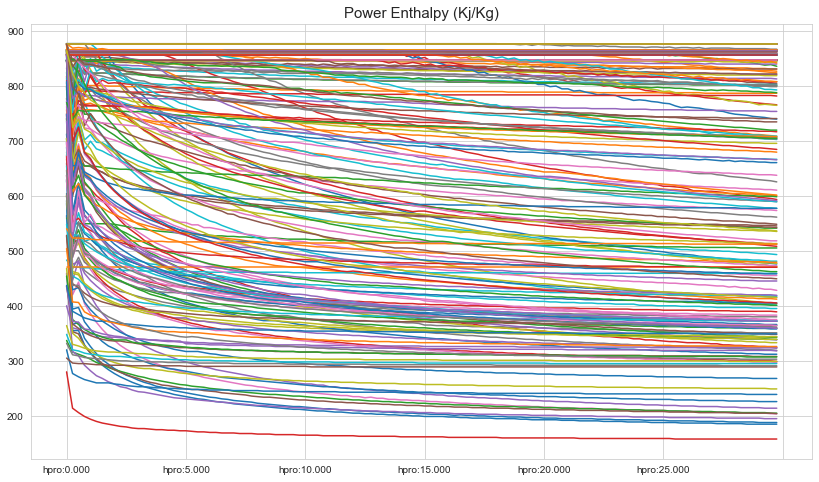

In [19]:
sns.set_style('whitegrid')
df_Enthalpy.dropna().head(200).transpose().plot(legend=False)
plt.title('Power Enthalpy (Kj/Kg)')

In [20]:
df_Power = create_timeseries(df_raw,'Pout')

In [21]:
len(df_Power.columns)

120

Text(0.5, 1.0, 'Electrical Power (KW)')

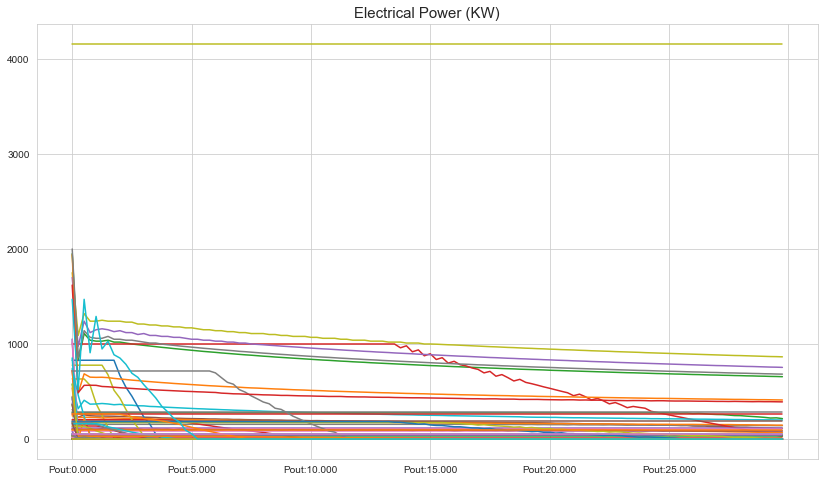

In [22]:
df_Power.head(100).transpose().plot(legend=False)
plt.title('Electrical Power (KW)')

In [23]:
df_Thermal = create_timeseries(df_raw,'dhout')

In [24]:
len(df_Thermal.columns)

120

Text(0.5, 1.0, 'Extracted thermal Power (KJ/s)')

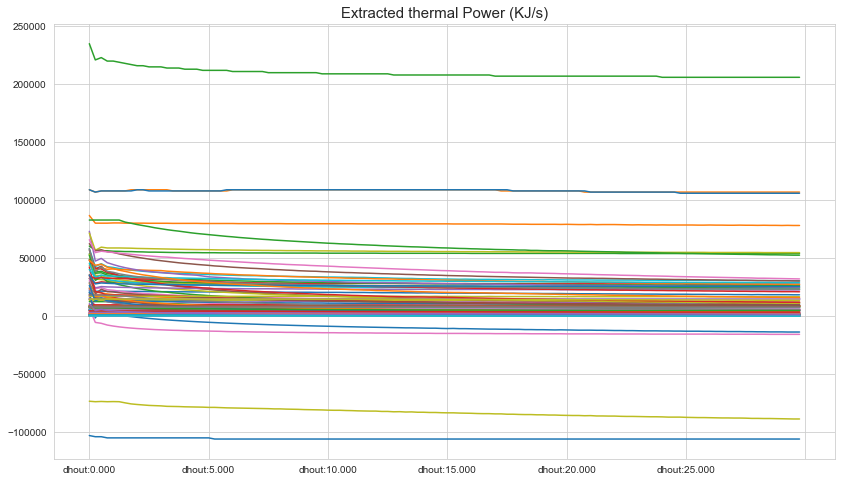

In [25]:
df_Thermal.tail(100).transpose().plot(legend=False)
plt.title('Extracted thermal Power (KJ/s)')

- Feature engineering: Average quarterly time-series to yearly time-series and filter to 20year lifespan

In [26]:
"""
Function that averages time-series with quarterly values by yearly values.
Main objective: Reduce number of outputs.
"""

def avg_20yearlifespan(dataset,columname='col',numbers_per_year=4,start=0,fr=120,to=140,counter=0):
    counter = counter
    for i in range(start,len(dataset.columns),numbers_per_year):
        dataset[columname+':'+str(counter)] = dataset.iloc[:,i:i+numbers_per_year].mean(axis=1)
        counter += 1
    dataset = dataset.iloc[:,fr:to]
    return(dataset)

In [27]:
df_Enthalpy = avg_20yearlifespan(df_Enthalpy,'hpro')

In [28]:
df_Power = avg_20yearlifespan(df_Power,'Pout')

In [29]:
df_Thermal = avg_20yearlifespan(df_Thermal,'dhout')

In [30]:
df_Enthalpy.shape, df_Power.shape, df_Thermal.shape

((44492, 20), (44492, 20), (44492, 20))

- **Import Second Dataset inputs_results_FORGE_medium20yr.csv**

In [31]:
df_raw2 = pd.read_csv('inputs_results_FORGE_medium20yr.csv')

In [32]:
df_raw2.head()

,pin,size,ResDepth,ResGradient,ResRho,ResKt,ResSv,AmbTempC,AmbPres,ResE,Resv,ResG,Ks3,Ks2,s3Azn,s3AznVar,s3Dip,s3DipVar,fNum0,fDia_min0,fDia_max0,fStr_nom0,fStr_var0,fDip_nom0,fDip_var0,fNum1,fDia_min1,fDia_max1,fStr_nom1,fStr_var1,fDip_nom1,fDip_var1,fNum2,fDia_min2,fDia_max2,fStr_nom2,fStr_var2,fDip_nom2,fDip_var2,alpha0,alpha1,alpha2,gamma0,gamma1,gamma2,n10,n11,n12,a0,a1,a2,b0,b1,b2,N0,N1,N2,bh0,bh1,bh2,bh_min,bh_max,bh_bound,f_roughness,w_count,w_spacing,w_length,w_azimuth,w_dip,w_proportion,w_phase,w_toe,w_skew,w_intervals,ra,rb,rc,rgh,CemKt,CemSv,GenEfficiency,LifeSpan,TimeSteps,p_whp,Tinj,H_ConvCoef,dT0,dE0,PoreRho,Poremu,Porek,Frack,BH_T,BH_P,s1,s2,s3,perf,r_perf,sand,leakoff,dPp,dPi,stim_limit,Qinj,Vinj,Qstim,Vstim,bval,phi0,phi1,phi2,mcc0,mcc1,mcc2,hfmcc,hfphi,type_last,Pc_last,sn_last,Pcen_last,Pmax_last,dia_last,qinj,qpro,qleak,qgain,recovery,pinj,hinj,v5,ixint,pxint,hfstim,nfstim,mpro,hpro:0.000,hpro:0.328,hpro:0.656,hpro:0.984,hpro:1.311,hpro:1.639,hpro:1.967,hpro:2.295,hpro:2.623,hpro:2.951,hpro:3.279,hpro:3.607,hpro:3.934,hpro:4.262,hpro:4.590,hpro:4.918,hpro:5.246,hpro:5.574,hpro:5.902,hpro:6.230,hpro:6.557,hpro:6.885,hpro:7.213,hpro:7.541,hpro:7.869,hpro:8.197,hpro:8.525,hpro:8.852,hpro:9.180,hpro:9.508,hpro:9.836,hpro:10.164,hpro:10.492,hpro:10.820,hpro:11.148,hpro:11.475,hpro:11.803,hpro:12.131,hpro:12.459,hpro:12.787,hpro:13.115,hpro:13.443,hpro:13.770,hpro:14.098,hpro:14.426,hpro:14.754,hpro:15.082,hpro:15.410,hpro:15.738,hpro:16.066,hpro:16.393,hpro:16.721,hpro:17.049,hpro:17.377,hpro:17.705,hpro:18.033,hpro:18.361,hpro:18.689,hpro:19.016,hpro:19.344,hpro:19.672,Pout:0.000,Pout:0.328,Pout:0.656,Pout:0.984,Pout:1.311,Pout:1.639,Pout:1.967,Pout:2.295,Pout:2.623,Pout:2.951,Pout:3.279,Pout:3.607,Pout:3.934,Pout:4.262,Pout:4.590,Pout:4.918,Pout:5.246,Pout:5.574,Pout:5.902,Pout:6.230,Pout:6.557,Pout:6.885,Pout:7.213,Pout:7.541,Pout:7.869,Pout:8.197,Pout:8.525,Pout:8.852,Pout:9.180,Pout:9.508,Pout:9.836,Pout:10.164,Pout:10.492,Pout:10.820,Pout:11.148,Pout:11.475,Pout:11.803,Pout:12.131,Pout:12.459,Pout:12.787,Pout:13.115,Pout:13.443,Pout:13.770,Pout:14.098,Pout:14.426,Pout:14.754,Pout:15.082,Pout:15.410,Pout:15.738,Pout:16.066,Pout:16.393,Pout:16.721,Pout:17.049,Pout:17.377,Pout:17.705,Pout:18.033,Pout:18.361,Pout:18.689,Pout:19.016,Pout:19.344,Pout:19.672,dhout:0.000,dhout:0.328,dhout:0.656,dhout:0.984,dhout:1.311,dhout:1.639,dhout:1.967,dhout:2.295,dhout:2.623,dhout:2.951,dhout:3.279,dhout:3.607,dhout:3.934,dhout:4.262,dhout:4.590,dhout:4.918,dhout:5.246,dhout:5.574,dhout:5.902,dhout:6.230,dhout:6.557,dhout:6.885,dhout:7.213,dhout:7.541,dhout:7.869,dhout:8.197,dhout:8.525,dhout:8.852,dhout:9.180,dhout:9.508,dhout:9.836,dhout:10.164,dhout:10.492,dhout:10.820,dhout:11.148,dhout:11.475,dhout:11.803,dhout:12.131,dhout:12.459,dhout:12.787,dhout:13.115,dhout:13.443,dhout:13.770,dhout:14.098,dhout:14.426,dhout:14.754,dhout:15.082,dhout:15.410,dhout:15.738,dhout:16.066,dhout:16.393,dhout:16.721,dhout:17.049,dhout:17.377,dhout:17.705,dhout:18.033,dhout:18.361,dhout:18.689,dhout:19.016,dhout:19.344,dhout:19.672
0,682848997,1600.0,2350.0,85.4,2620.0,2.39,2380.0,0,0.101,6.110000e+10,0.314,2.330000e+10,0.225,0.421,5.60,0.0175,-0.224,0.0175,22.0,150.0,1500.0,1.68,0.14,1.4,0.105,4.0,150.0,1500.0,3.23,0.14,0.838,0.105,12.0,150.0,1500.0,0.611,0.14,1.12,0.105,2.000000e-09,2.900000e-08,1.000000e-07,0.001,0.01,0.0631,1.0,1.0,1.0,0,0.2,0.8,0.999,1.0,1.0,0,0.6,2.0,1.000000e-08,0.00005,0.0001,5.000000e-08,1.0,0.000858,0.580,1.0,782.0,1110.0,1.83,0.438,0.874,4.71,-0.0687,0.0628,2.0,0.0889,0.102,0.114,80.0,2.0,2000.0,1.0,631000000.0,61.0,1000000.0,77.4,3.0,1.0,1340000.0,931.0,0.0002,9.870000e-11,9.870000e-08,474.0,21500000.0,60400000.0,37900000.0,30300000.0,1.0,156.0,0.3,0,-7450000.0,100000.0,5.0,0.001800,1140000.0,0.01,400.0,1.0,0.349,0.611,0.785,1000000.0,3000000.0,6000000.0,293000.0,0.539,2.0,30600000.0,30300000.0,21900000.0,29100000.0,1690.0,0.00360,-0.00360,0.0,0.000003,-1.0,30.9,349.0,0.00102,2.0,2.0,2.0,0.0,-3.53,865.0,865.0,

In [33]:
df_raw2.isnull().sum().sort_values(ascending=False)

dhout:19.672    12
hpro:18.361     12
Pout:1.311      12
Pout:0.984      12
Pout:0.656      12
                ..
s3               0
perf             0
r_perf           0
sand             0
pin              0
Length: 319, dtype: int64

In [34]:
# Must eliminate rows with null data before Data Modeling
df_raw2[df_raw2.isnull().any(axis=1)]

,pin,size,ResDepth,ResGradient,ResRho,ResKt,ResSv,AmbTempC,AmbPres,ResE,Resv,ResG,Ks3,Ks2,s3Azn,s3AznVar,s3Dip,s3DipVar,fNum0,fDia_min0,fDia_max0,fStr_nom0,fStr_var0,fDip_nom0,fDip_var0,fNum1,fDia_min1,fDia_max1,fStr_nom1,fStr_var1,fDip_nom1,fDip_var1,fNum2,fDia_min2,fDia_max2,fStr_nom2,fStr_var2,fDip_nom2,fDip_var2,alpha0,alpha1,alpha2,gamma0,gamma1,gamma2,n10,n11,n12,a0,a1,a2,b0,b1,b2,N0,N1,N2,bh0,bh1,bh2,bh_min,bh_max,bh_bound,f_roughness,w_count,w_spacing,w_length,w_azimuth,w_dip,w_proportion,w_phase,w_toe,w_skew,w_intervals,ra,rb,rc,rgh,CemKt,CemSv,GenEfficiency,LifeSpan,TimeSteps,p_whp,Tinj,H_ConvCoef,dT0,dE0,PoreRho,Poremu,Porek,Frack,BH_T,BH_P,s1,s2,s3,perf,r_perf,sand,leakoff,dPp,dPi,stim_limit,Qinj,Vinj,Qstim,Vstim,bval,phi0,phi1,phi2,mcc0,mcc1,mcc2,hfmcc,hfphi,type_last,Pc_last,sn_last,Pcen_last,Pmax_last,dia_last,qinj,qpro,qleak,qgain,recovery,pinj,hinj,v5,ixint,pxint,hfstim,nfstim,mpro,hpro:0.000,hpro:0.328,hpro:0.656,hpro:0.984,hpro:1.311,hpro:1.639,hpro:1.967,hpro:2.295,hpro:2.623,hpro:2.951,hpro:3.279,hpro:3.607,hpro:3.934,hpro:4.262,hpro:4.590,hpro:4.918,hpro:5.246,hpro:5.574,hpro:5.902,hpro:6.230,hpro:6.557,hpro:6.885,hpro:7.213,hpro:7.541,hpro:7.869,hpro:8.197,hpro:8.525,hpro:8.852,hpro:9.180,hpro:9.508,hpro:9.836,hpro:10.164,hpro:10.492,hpro:10.820,hpro:11.148,hpro:11.475,hpro:11.803,hpro:12.131,hpro:12.459,hpro:12.787,hpro:13.115,hpro:13.443,hpro:13.770,hpro:14.098,hpro:14.426,hpro:14.754,hpro:15.082,hpro:15.410,hpro:15.738,hpro:16.066,hpro:16.393,hpro:16.721,hpro:17.049,hpro:17.377,hpro:17.705,hpro:18.033,hpro:18.361,hpro:18.689,hpro:19.016,hpro:19.344,hpro:19.672,Pout:0.000,Pout:0.328,Pout:0.656,Pout:0.984,Pout:1.311,Pout:1.639,Pout:1.967,Pout:2.295,Pout:2.623,Pout:2.951,Pout:3.279,Pout:3.607,Pout:3.934,Pout:4.262,Pout:4.590,Pout:4.918,Pout:5.246,Pout:5.574,Pout:5.902,Pout:6.230,Pout:6.557,Pout:6.885,Pout:7.213,Pout:7.541,Pout:7.869,Pout:8.197,Pout:8.525,Pout:8.852,Pout:9.180,Pout:9.508,Pout:9.836,Pout:10.164,Pout:10.492,Pout:10.820,Pout:11.148,Pout:11.475,Pout:11.803,Pout:12.131,Pout:12.459,Pout:12.787,Pout:13.115,Pout:13.443,Pout:13.770,Pout:14.098,Pout:14.426,Pout:14.754,Pout:15.082,Pout:15.410,Pout:15.738,Pout:16.066,Pout:16.393,Pout:16.721,Pout:17.049,Pout:17.377,Pout:17.705,Pout:18.033,Pout:18.361,Pout:18.689,Pout:19.016,Pout:19.344,Pout:19.672,dhout:0.000,dhout:0.328,dhout:0.656,dhout:0.984,dhout:1.311,dhout:1.639,dhout:1.967,dhout:2.295,dhout:2.623,dhout:2.951,dhout:3.279,dhout:3.607,dhout:3.934,dhout:4.262,dhout:4.590,dhout:4.918,dhout:5.246,dhout:5.574,dhout:5.902,dhout:6.230,dhout:6.557,dhout:6.885,dhout:7.213,dhout:7.541,dhout:7.869,dhout:8.197,dhout:8.525,dhout:8.852,dhout:9.180,dhout:9.508,dhout:9.836,dhout:10.164,dhout:10.492,dhout:10.820,dhout:11.148,dhout:11.475,dhout:11.803,dhout:12.131,dhout:12.459,dhout:12.787,dhout:13.115,dhout:13.443,dhout:13.770,dhout:14.098,dhout:14.426,dhout:14.754,dhout:15.082,dhout:15.410,dhout:15.738,dhout:16.066,dhout:16.393,dhout:16.721,dhout:17.049,dhout:17.377,dhout:17.705,dhout:18.033,dhout:18.361,dhout:18.689,dhout:19.016,dhout:19.344,dhout:19.672
41,573154604,1600.0,2350.0,87.1,2920.0,2.50,2710.0,0,0.101,5.580000e+10,0.327,2.100000e+10,0.498,0.534,4.69,0.0175,0.305,0.0175,2.0,150.0,1500.0,1.68,0.14,1.4,0.105,51.0,150.0,1500.0,3.23,0.14,0.838,0.105,1.0,150.0,1500.0,0.611,0.14,1.12,0.105,2.000000e-09,2.900000e-08,1.000000e-07,0.001,0.01,0.0631,1.0,1.0,1.0,0,0.2,0.8,0.999,1.0,1.0,0,0.6,2.0,1.000000e-08,0.00005,0.0001,5.000000e-08,1.0,0.000669,0.500,1.0,899.0,1110.0,1.83,0.438,0.882,0.00,-0.0395,-0.0846,2.0,0.0889,0.102,0.114,80.0,2.0,2000.0,1.0,631000000.0,61.0,1000000.0,57.8,3.0,1.0,1730000.0,921.0,0.0002,9.870000e-11,9.870000e-08,478.0,21200000.0,67300000.0,45800000.0,44100000.0,1.0,180.0,0.3,0,-6080000.0,100000.0,5.0,0.043100,27200000.0,0.01,400.0,1.0,0.349,0.611,0.785,1000000.0,3000000.0,6000000.0,307000.0,0.555,2.0,44400000.0,44100000.0,40300000.0,40700000.0,1890.0,0.086300,0.0,-0.086200,0.0,0.0,44.8,280.0,0.000999,3.0,0.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,

In [35]:
df2 = df_raw2.dropna()

In [36]:
# Filter meaningful information from raw dataset
df2 = df2.loc[:,df2.nunique() > 1]

In [37]:
# Make sure columns from initial dataset are same as second dataset:
df2.loc[:,'ResDepth':'hfphi'].columns == inputs.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [38]:
# Make sure columns from initial dataset are same as second dataset:
df2.loc[:,'type_last':'mpro'].columns == outputs.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [39]:
df_Enthalpy2 = create_timeseries(df2,'hpro')

In [40]:
df_Enthalpy2['hpro'+':'+str(0)] = df_Enthalpy2.iloc[:,:4].mean(axis=1)
df_Enthalpy2 = avg_20yearlifespan(df_Enthalpy2,columname='hpro',numbers_per_year=3,start=4,fr=61,to=81,counter=1)

In [41]:
df_Power2 = create_timeseries(df2,'Pout')

In [42]:
df_Power2['Pout'+':'+str(0)] = df_Power2.iloc[:,:4].mean(axis=1)
df_Power2 = avg_20yearlifespan(df_Power2,columname='Pout',numbers_per_year=3,start=4,fr=61,to=81,counter=1)

In [43]:
df_Thermal2 = create_timeseries(df2,'dhout')

In [44]:
df_Thermal2['dhout'+':'+str(0)] = df_Thermal2.iloc[:,:4].mean(axis=1)
df_Thermal2 = avg_20yearlifespan(df_Thermal2,columname='dhout',numbers_per_year=3,start=4,fr=61,to=81,counter=1)

In [45]:
inputs = pd.concat([inputs,df2.loc[:,'ResDepth':'hfphi']])

In [46]:
outputs = pd.concat([outputs,df2.loc[:,'type_last':'mpro']])

In [47]:
df_Enthalpy = pd.concat([df_Enthalpy,df_Enthalpy2])

In [48]:
df_Power = pd.concat([df_Power,df_Power2])

In [49]:
df_Thermal = pd.concat([df_Thermal,df_Thermal2])

In [50]:
inputs.shape,df_Enthalpy.shape, df_Power.shape, df_Thermal.shape,outputs.shape

((45485, 37), (45485, 20), (45485, 20), (45485, 20), (45485, 19))

- **Export all dataframes for future Data Modeling**

In [95]:
# inputs.to_csv('inputs.csv')
# df_Enthalpy.to_csv('df_Enthalpy.csv')
# df_Power.to_csv('df_Power.csv')
# df_Thermal.to_csv('df_Thermal.csv')
# outputs.to_csv('outputs.csv')

In [97]:
df_Thermal.describe()

,dhout:0,dhout:1,dhout:2,dhout:3,dhout:4,dhout:5,dhout:6,dhout:7,dhout:8,dhout:9,dhout:10,dhout:11,dhout:12,dhout:13,dhout:14,dhout:15,dhout:16,dhout:17,dhout:18,dhout:19
count,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000
mean,16443.185681,13721.464395,12618.219380,11867.687612,11294.788598,10831.741846,10442.962512,10108.826948,9815.847297,9555.758843,9321.160612,9108.614984,8913.715388,8733.881874,8566.897112,8411.508706,8266.917119,8130.159767,8001.788260,7880.278586
std,47039.485061,46500.418599,46210.729225,46001.656924,45833.055030,45696.163953,45577.035553,45476.191914,45386.641612,45306.724021,45235.183580,45170.425414,45110.669079,45056.925494,45007.144851,44960.107190,44916.744512,44876.698496,44837.007437,44801.271926
min,-507000.000000,-507000.000000,-507750.000000,-508000.000000,-509000.000000,-509500.000000,-510000.000000,-510500.000000,-511000.000000,-511500.000000,-512000.000000,-512500.000000,-513000.000000,-514000.000000,-514000.000000,-515000.000000,-515000.000000,-516000.000000,-516000.000000,-516750.000000
25%,1717.500000,1435.000000,1320.000000,1230.000000,1167.500000,1117.500000,1075.000000,1035.750000,1003.250000,973.500000,947.000000,925.000000,904.250000,884.000000,865.250000,850.000000,834.000000,822.000000,809.500000,797.000000
50%,6640.000000,5315.000000,4790.000000,4470.000000,4232.500000,4010.000000,3850.000000,3710.000000,3580.000000,3470.000000,3380.000000,3290.000000,3215.000000,3150.000000,3095.000000,3040.000000,2980.000000,2927.500000,2875.000000,2830.000000
75%,22775.000000,18625.000000,17000.000000,15900.000000,15000.000000,14350.000000,13800.000000,13375.000000,12950.000000,12600.000000,12250.000000,11950.000000,11700.000000,11500.000000,11300.000000,11100.000000,10925.000000,10725.000000,10575.000000,10400.000000
max,677000.000000,677000.000000,677000.000000,677000.000000,677000.000000,677000.000000,677000.000000,677000.000000,677000.000000,677000.000000,677000.000000,677000.000000,677000.000000,677000.000000,677000.000000,677000.000000,677000.000000,677000.000000,677000.000000,677000.000000


In [98]:
df_Power.describe()

,Pout:0,Pout:1,Pout:2,Pout:3,Pout:4,Pout:5,Pout:6,Pout:7,Pout:8,Pout:9,Pout:10,Pout:11,Pout:12,Pout:13,Pout:14,Pout:15,Pout:16,Pout:17,Pout:18,Pout:19
count,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000
mean,241.133550,163.223204,146.434811,136.032485,128.403267,122.466370,117.569957,113.449476,109.917679,106.863484,104.179271,101.794269,99.664000,97.755412,96.050851,94.481408,93.025365,91.669998,90.393749,89.204710
std,504.947073,478.390779,463.240189,452.232708,443.765005,437.089201,431.642132,427.138131,423.337894,420.164742,417.512014,415.253064,413.266161,411.516359,409.931347,408.408352,406.958800,405.614155,404.287264,403.047727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.825000,1.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,270.000000,118.000000,95.400000,84.100000,75.100000,68.500000,63.200000,58.900000,54.900000,51.700000,49.100000,46.800000,44.600000,42.500000,40.875000,39.250000,37.850000,36.500000,35.200000,33.700000
max,16200.000000,16200.000000,15350.000000,13200.000000,11150.000000,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000


#### END 